# Local de Trabalho

## Pacotes

In [1]:
#Importa os pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use('seaborn-darkgrid')

#### Dicionário de Variáveis utilizadas

|Chave|Descrição|Função|
|-----|-----|-----|
|**Identificação**|
|Ano| Ano de referência|Controle|
|Trimestre| Trimestre de referência|Controle|
|UF| Estado|Controle|
|Capital| Capital da UF|Controle|
|UPA| Unidade Primária de Amostragem (UF(2) + número squencial(6) + DV(1))|Controle|
|V1008| Número do Domicílio|Controle|
|V1014| Painel - Grupo de Controle|Controle|
|V1016| Número de entrevista (1 a 5)|Controle|
|V2003| Número de ordem|Controle|
|**Características**|
|V2007| Sexo|Característica|
|V2008| Dia Nascimento|Característica|
|V20081| Mês nascimento|Característica|
|V20082| Ano nascimento|Característica|
|V2010| Raça|Característica|
|**Variáveis exploradas**|
| VD4002 | Condição de ocupação na semana de referência para pessoas de 14 anos ou mais de idade | Descrição |
|**Auxiliares**|
|V1028| Peso do domicílio e das pessoas sem calibração|Expansão|
|V1029| Peso do domicílio e das pessoas com calibração|Expansão|
|V1033| Projeção da população por sexo e idade|Expansão|
|posest|Domínios de projeção geográficos|Expansão|

 Chave para pessoa: UPA + V1008 + V1014  + V2003 + V2007 + V2008 + V20081 + V20082

 **PARA ESTIMAÇÃO DA POPULAÇÃO, DEVE-SE USAR AS VARIÁVEIS: V1033 e posest.**



## Importação e tratamento dos microdados

### Importação dos microdados

In [2]:
#determina qual diretório usar para cada sistema operacional.
import os
if os.name == 'nt': #windows
    diretorio = 'C:\\Users\\est.matheus.brasil\\Documents\\Microdados PNAD Contínua\\feather\\'

else: #linux(ou mac)
    diretorio = '/home/matheus/Microdados PNAD/feather/'


#Leitura de todas as bases com as variáveis selecionadas e criação de variáveis dinamicamente.

colunas_selecionadas = ['Ano', 'Trimestre', 'UPA', 'UF', 'V1008', 'V1014', 'V2007', 'V2008', 'V20081', 'V20082', 'V2010', #Controle
                        'VD4001', 'V4022', #Variáveis de interesse
                        'V1028', 'V1029', 'V1033', 'posest', 'posest_sxi'] #identificação

# colunas_selecionadas_sup = ['Ano', 'Trimestre', 'UPA', 'UF', 'V1008', 'V1014', 'V2007', 'V2008', 'V20081', 'V20082', 'V2010', #Controle
#                         'VD4001', 'VD4002', 'VD4003', 'VD4004A','S01021', #Variáveis de interesse
#                         'V1028', 'V1029', 'V1033', 'posest', 'posest_sxi'] #identificação
                        

for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
                print(f'lendo PNAD {ano} {tri}')
                globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)
        if 2019 < ano < 2022:
                print(f'lendo PNAD {ano} {tri}')
                globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)
        if ano == 2022 and tri < 3:
            print(f'lendo PNAD {ano} {tri}')
            globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)

lendo PNAD 2019 4
lendo PNAD 2020 1
lendo PNAD 2020 2
lendo PNAD 2020 3
lendo PNAD 2020 4
lendo PNAD 2021 1
lendo PNAD 2021 2
lendo PNAD 2021 3
lendo PNAD 2021 4
lendo PNAD 2022 1
lendo PNAD 2022 2


In [72]:
#Concatena todos os dataframes de cada ano e trimestre em uma unica tabela.
pnadc_completa = pd.concat([pnad_2019_4, pnad_2020_1, pnad_2020_2, pnad_2020_3, pnad_2020_4, pnad_2021_1, pnad_2021_2, pnad_2021_3, pnad_2021_4, pnad_2022_1, pnad_2022_2])

In [74]:
#Converte variável para criar ID
pnadc_completa['V2007'] = np.where(pnadc_completa['V2007'] == 'Homem', 0, 1)
#Converte variáveis para numéricas
pnadc_completa['UPA'] = pd.to_numeric(pnadc_completa['UPA'] , errors='coerce') 
pnadc_completa['V1008'] = pd.to_numeric(pnadc_completa['V1008'] , errors='coerce') 
pnadc_completa['V1014'] = pd.to_numeric(pnadc_completa['V1014'] , errors='coerce') 
pnadc_completa['V2007'] = pd.to_numeric(pnadc_completa['V2007'] , errors='coerce') 
pnadc_completa['V2008'] = pd.to_numeric(pnadc_completa['V2008'] , errors='coerce') 
pnadc_completa['V20081'] = pd.to_numeric(pnadc_completa['V20081'] , errors='coerce') 
pnadc_completa['V20082'] = pd.to_numeric(pnadc_completa['V20082'] , errors='coerce') 

#Cria chave ID e novo df
pnadc_completa = pd.DataFrame({
    #Controle
    'Ano':pnadc_completa['Ano'], 
    'Trimestre':pnadc_completa['Trimestre'],
    'UPA':pnadc_completa['UPA'],
    'UF':pnadc_completa['UF'],
    'V2007':pnadc_completa['V2007'],
    #ID  
    'ID': pnadc_completa['UPA'] + 
        pnadc_completa['V1008'] + 
        pnadc_completa['V1014'] + 
        pnadc_completa['V2007'] +
        pnadc_completa['V2008'] +
        pnadc_completa['V20081'] +
        pnadc_completa['V20082'],
    #Exploradas
    'V4001': pnadc_completa['VD4001'],
    'V4022': pnadc_completa['V4022'],
    #Expansão
    'V1028': pnadc_completa['V1028'],
    'V1029': pnadc_completa['V1029'],
    'V1033': pnadc_completa['V1033'],
    'posest': pnadc_completa['posest'],
    'posest_sxi': pnadc_completa['posest_sxi']
    })

#Reverte alteração da coluna V2007 para os rótulos anteiores
pnadc_completa['V2007'] = pnadc_completa['V2007'].apply(lambda x: 'Homem' if x == 0 else 'Mulher')
# Ordernação da série histórica por ano e trimestre.
pnadc_completa.sort_values(by=['Ano', 'Trimestre'], inplace=True)
#concatena a coluna 'Ano' e 'Trimestre' em uma única coluna.
pnadc_completa['ano_tri'] = pnadc_completa['Ano'].astype(str) + 'Q' + pnadc_completa['Trimestre'].astype(str)
#Conversão da coluna ano_tri para datetime.
pnadc_completa['ano_tri'] = pd.to_datetime(pnadc_completa['ano_tri']).dt.to_period('Q')

### Análise Exploratória (Expandida)

#### Descritiva Gerais

População total estimada (2T2022)

In [58]:
pop_uf = pd.crosstab(pnadc_completa['ano_tri'], pnadc_completa['UF'], values=pnadc_completa['V1028'], aggfunc='sum')

In [60]:
pop_uf.sum(axis=1)

ano_tri
2019Q4    2.100772e+08
2020Q1    2.104744e+08
2020Q2    2.108694e+08
2020Q3    2.112621e+08
2020Q4    2.116524e+08
2021Q1    2.120402e+08
2021Q2    2.124255e+08
2021Q3    2.128082e+08
2021Q4    2.131883e+08
2022Q1    2.135656e+08
2022Q2    2.139401e+08
Freq: Q-DEC, dtype: float64

Quantidade estimada de pessoas do sexo masculino e feminino por UF

In [6]:
populacao_uf = pd.crosstab(pnadc_completa['ano_tri'], pnadc_completa['UF'], values=pnadc_completa['V1028'], aggfunc='sum')

In [61]:
pop_sexo_uf = pd.crosstab(
                        index=pnadc_completa['ano_tri'], 
                        columns=[pnadc_completa['UF'], pnadc_completa['V2007']], 
                        values=pnadc_completa['V1028'], aggfunc='sum')

In [62]:
pop_sexo_uf

UF                Acre                      Alagoas                \
V2007            Homem         Mulher         Homem        Mulher   
ano_tri                                                             
2019Q4   430152.941687  440049.058319  1.609581e+06  1.726551e+06   
2020Q1   425680.299178  447570.700826  1.625037e+06  1.714577e+06   
2020Q2   439149.510975  437146.489033  1.627893e+06  1.715181e+06   
2020Q3   432266.209713  447064.790375  1.595457e+06  1.751050e+06   
2020Q4   443263.471019  439098.529380  1.602511e+06  1.747405e+06   
2021Q1   451282.093709  434100.907596  1.583739e+06  1.769556e+06   
2021Q2   444366.955426  444031.046559  1.591930e+06  1.764725e+06   
2021Q3   442737.504213  448661.497128  1.601884e+06  1.758105e+06   
2021Q4   438746.742697  455649.257304  1.613943e+06  1.749353e+06   
2022Q1   442551.236003  454830.763997  1.622244e+06  1.744324e+06   
2022Q2   449006.143112  451356.857194  1.619324e+06  1.750499e+06   

UF               Amapá                     Amazonas                \
V2007            Homem         Mulher         Homem        Mulher   
ano_tri                                                             
2019Q4   404038.317511  439303.682840  2.017295e+06  1.988438e+06   
2020Q1   411406.637521  435913.364058  2.018783e+06  2.002093e+06   
2020Q2   406538.884082  444746.116435  2.069242e+06  1.966741e+06   
2020Q3   423839.030275  431395.970122  2.068513e+06  1.982532e+06   
2020Q4   428249.875071  430927.126840  2.089978e+06  1.976079e+06   
2021Q1   420597.739017  442508.263667  2.095664e+06  1.985356e+06   
2021Q2   425452.514962  441570.490078  2.052914e+06  2.043032e+06   
2021Q3   434145.590256  436781.426112  2.055085e+06  2.055724e+06   
2021Q4   438455.868074  436366.131926  2.074761e+06  2.050869e+06   
2022Q1   446219.975836  432480.024164  2.047620e+06  2.092783e+06   
2022Q2   448975.279494  433591.726499  2.072651e+06  2.082472e+06   

UF              Bahia                ...        Roraima                 \
V2007           Homem        Mulher  ...          Homem         Mulher   
ano_tri                              ...                                 
2019Q4   7.285364e+06  7.589657e+06  ...  274897.498162  266078.501839   
2020Q1   7.271739e+06  7.617368e+06  ...  279154.351121  266549.648881   
2020Q2   7.253848e+06  7.649205e+06  ...  268084.470168  282337.529837   
2020Q3   7.155244e+06  7.761616e+06  ...  271785.299759  283338.700291   
2020Q4   7.163907e+06  7.766606e+06  ...  272716.403508  287089.596711   
2021Q1   7.294317e+06  7.649707e+06  ...  276112.318091  288346.682473   
2021Q2   7.291051e+06  7.666309e+06  ...  277665.777458  291415.223516   
2021Q3   7.247404e+06  7.723134e+06  ...  282845.972695  290819.027941   
2021Q4   7.203285e+06  7.780261e+06  ...  286791.996118  291415.003882   
2022Q1   7.196641e+06  7.799742e+06  ...  289319.573780  293381.426220   
2022Q2   7.179435e+06  7.829613e+06  ...  292712.637725  294428.362547   

UF      Santa Catarina                     Sergipe                \
V2007            Homem        Mulher         Homem        Mulher   
ano_tri                                                            
2019Q4    3.566377e+06  3.618063e+06  1.124256e+06  1.181939e+06   
2020Q1    3.576531e+06  3.629787e+06  1.131439e+06  1.179747e+06   
2020Q2    3.611385e+06  3.616730e+06  1.132725e+06  1.183420e+06   
2020Q3    3.645299e+06  3.604509e+06  1.121889e+06  1.199193e+06   
2020Q4    3.612037e+06  3.659391e+06  1.116307e+06  1.209687e+06   
2021Q1    3.697443e+06  3.595506e+06  1.124805e+06  1.206075e+06   
2021Q2    3.673223e+06  3.641147e+06  1.123442e+06  1.212297e+06   
2021Q3    3.683040e+06  3.652644e+06  1.133710e+06  1.206863e+06   
2021Q4    3.703664e+06  3.653241e+06  1.146102e+06  1.199277e+06   
2022Q1    3.695320e+06  3.682692e+06  1.150971e+06  1.199185e+06   
2022Q2    3.697736e+06  3.701262e+06  1.147750e+06  1.207153e+06   

UF          São Paulo                    Tocantins                 
V2007   

Estimativa do total de pessoas por local de trabalho em todos os trimestres da série.

In [79]:
pnadc_completa

,Ano,Trimestre,UPA,UF,V2007,ID,V4001,V4022,V1028,V1029,V1033,posest,posest_sxi,ano_tri
0,2019,4,110000016,Rondônia,Mulher,110002003,Pessoas na força de trabalho,None,145.628790,532471,6982307,111,210,2019Q4
1,2019,4,110000016,Rondônia,Mulher,110002034,Pessoas fora da força de trabalho,None,145.628790,532471,8485527,111,206,2019Q4
2,2019,4,110000016,Rondônia,Mulher,110002051,Pessoas fora da força de trabalho,None,145.628790,532471,9316281,111,204,2019Q4
3,2019,4,110000016,Rondônia,Homem,110002077,None,None,145.628790,532471,7432741,111,102,2019Q4
4,2019,4,110000016,Rondônia,Homem,110002012,Pessoas fora da força de trabalho,None,134.017538,532471,5214819,111,112,2019Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482113,2022,2,530057544,Distrito Federal,Homem,530059585,Pessoas na força de trabalho,None,81.626590,3125014,8442398,531,107,2022Q2
482114,2022,2,530057544,Distrito Federal,Homem,530059543,Pessoas na força de trabalho,None,72.323502,3125014,3560554,531,114,2022Q2
482115,2022,2,530057544,Distrito Federal,Homem,530059578,Pessoas na força de trabalho,None,72.323502,3125014,8409440,531,108,2022Q2
482116,2022,2,530057544,Distrito Federal,Mulher,530059586,Pessoas fora da força de trabalho,None,72.323502,3125014,8558427,531,207,2022Q2


In [82]:
local_trabalho = pnadc_completa[pnadc_completa['V4001'] == 'Pessoas na força de trabalho']

In [83]:
local_trabalho = pd.crosstab(
                        index=local_trabalho['ano_tri'],
                        columns=local_trabalho['V4022'],
                        values=local_trabalho['V1028'], aggfunc='sum')

In [33]:
local_trabalho_expandido =  pd.crosstab(index=pnadc_completa['ano_tri'],
                            columns=pnadc_completa['V4022'], 
                            values=(pnadc_completa['V1029']*pnadc_completa['posest'])/pnadc_completa['V1029'], 
                            aggfunc='sum')                            


local_trabalho_expandido

V4022,"Em domicílio de empregador, patrão, sócio ou freguês",Em estabelecimento de outro négocio/empresa,"Em local designado pelo empregador, cliente ou freguês","Em outro local, especifique","Em veículo automotor (táxi, ônibus, caminhão, automóvel, embarcação, etc.)","Em via ou área pública (rua, rio, manguezal, mata pública, praça, praia etc.)","No domicílio de residência, em local exclusivo para o desempenho da atividade","No domicílio de residência, sem local exclusivo para o desempenho da atividade",Não Informado
ano_tri,,,,,,,,,
2019Q4,551165.0,872294.0,8314275.0,132746.0,2733870.0,1616684.0,1401940.0,1995927.0,151308350.0
2020Q1,429022.0,735621.0,7129620.0,110726.0,2482356.0,1420222.0,1256501.0,1780975.0,137035880.0
2020Q2,269039.0,565425.0,4717074.0,72425.0,1730357.0,807846.0,978294.0,1266258.0,105878250.0
2020Q3,274355.0,539021.0,4761211.0,85829.0,1584083.0,776977.0,1028754.0,1329210.0,104350278.0
2020Q4,276152.0,494578.0,4519339.0,83641.0,1516191.0,793143.0,1090419.0,1355368.0,94555829.0
2021Q1,261902.0,431484.0,4293998.0,74133.0,1407660.0,754611.0,1092998.0,1352015.0,89694905.0
2021Q2,313379.0,468991.0,4863340.0,90984.0,1566155.0,921672.0,1308249.0,1538922.0,100515576.0
2021Q3,416776.0,575540.0,6203848.0,127151.0,1962686.0,1192100.0,1614447.0,1919838.0,121842082.0
2021Q4,444946.0,620744.0,6762799.0,151675.0,2063158.0,1286129.0,1742474.0,2052621.0,128996028.0


Total de pessoas por local local de trabalho em cada trimestre

In [67]:
108*0.57

61.559999999999995

In [84]:
local_trabalho

V4022,"Em domicílio de empregador, patrão, sócio ou freguês",Em estabelecimento de outro négocio/empresa,"Em local designado pelo empregador, cliente ou freguês","Em outro local, especifique","Em veículo automotor (táxi, ônibus, caminhão, automóvel, embarcação, etc.)","Em via ou área pública (rua, rio, manguezal, mata pública, praça, praia etc.)","No domicílio de residência, em local exclusivo para o desempenho da atividade","No domicílio de residência, sem local exclusivo para o desempenho da atividade"
ano_tri,,,,,,,,
2019Q4,789709.722899,1.236277e+06,1.132902e+07,212916.845775,3.955918e+06,2.165784e+06,1.831868e+06,2.693341e+06
2020Q1,701944.313891,1.223946e+06,1.061401e+07,221009.612936,3.995271e+06,2.113078e+06,1.864319e+06,2.621345e+06
2020Q2,657413.032989,1.189164e+06,9.036653e+06,173308.095203,3.562474e+06,1.557331e+06,1.905368e+06,2.540183e+06
2020Q3,599594.070157,1.098308e+06,9.314704e+06,224112.321745,3.336062e+06,1.573461e+06,2.199757e+06,2.742379e+06
2020Q4,629358.837945,1.065162e+06,9.789034e+06,214680.105894,3.459792e+06,1.746654e+06,2.561337e+06,3.139704e+06
2021Q1,660179.241968,9.625236e+05,9.818323e+06,212059.388689,3.388735e+06,1.702673e+06,2.792237e+06,3.296771e+06
2021Q2,712444.835473,9.854194e+05,1.015423e+07,226305.537010,3.489069e+06,1.844787e+06,3.077199e+06,3.540468e+06
2021Q3,758260.830584,1.042760e+06,1.050220e+07,264909.664630,3.588348e+06,2.018605e+06,3.057095e+06,3.620738e+06
2021Q4,790217.935229,1.009780e+06,1.094845e+07,256972.804276,3.524321e+06,2.029596e+06,3.118895e+06,3.660457e+06


In [85]:
local_trabalho.sum(axis=1)

ano_tri
2019Q4    2.421484e+07
2020Q1    2.335492e+07
2020Q2    2.062189e+07
2020Q3    2.108838e+07
2020Q4    2.260572e+07
2021Q1    2.283350e+07
2021Q2    2.402992e+07
2021Q3    2.485292e+07
2021Q4    2.533869e+07
2022Q1    2.434602e+07
2022Q2    2.539287e+07
Freq: Q-DEC, dtype: float64

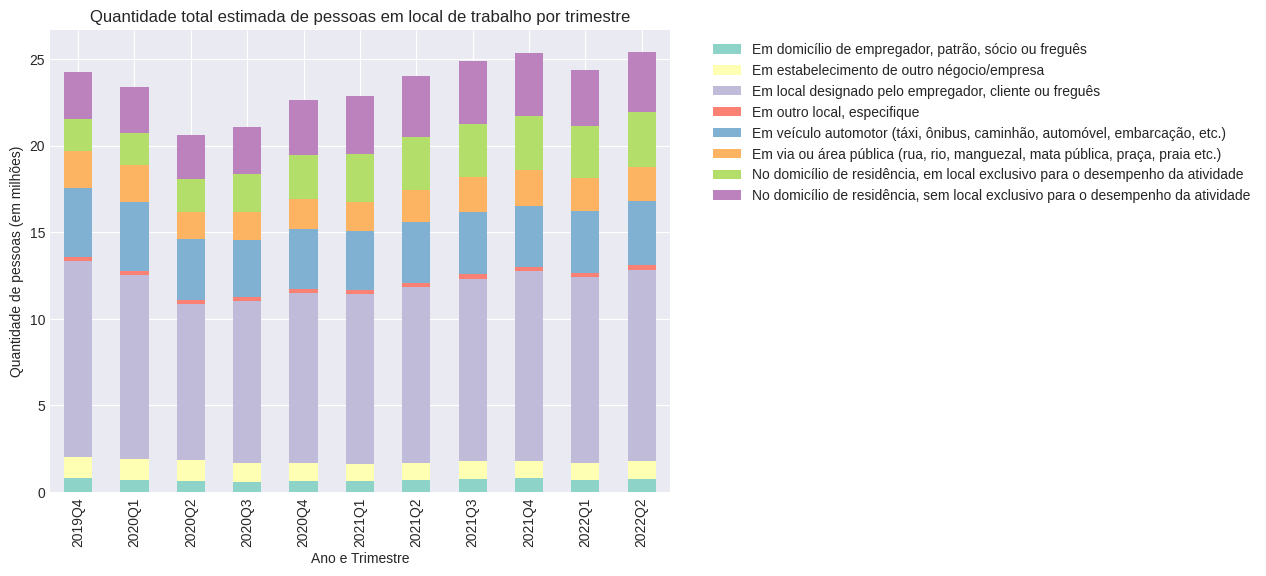

In [86]:
(local_trabalho / 1000000).plot(kind='bar', stacked=True, figsize=(8, 6), title='Quantidade total estimada de pessoas em local de trabalho por trimestre')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 10})
plt.xlabel('Ano e Trimestre')
plt.ylabel('Quantidade de pessoas (em milhões)')

plt.show()

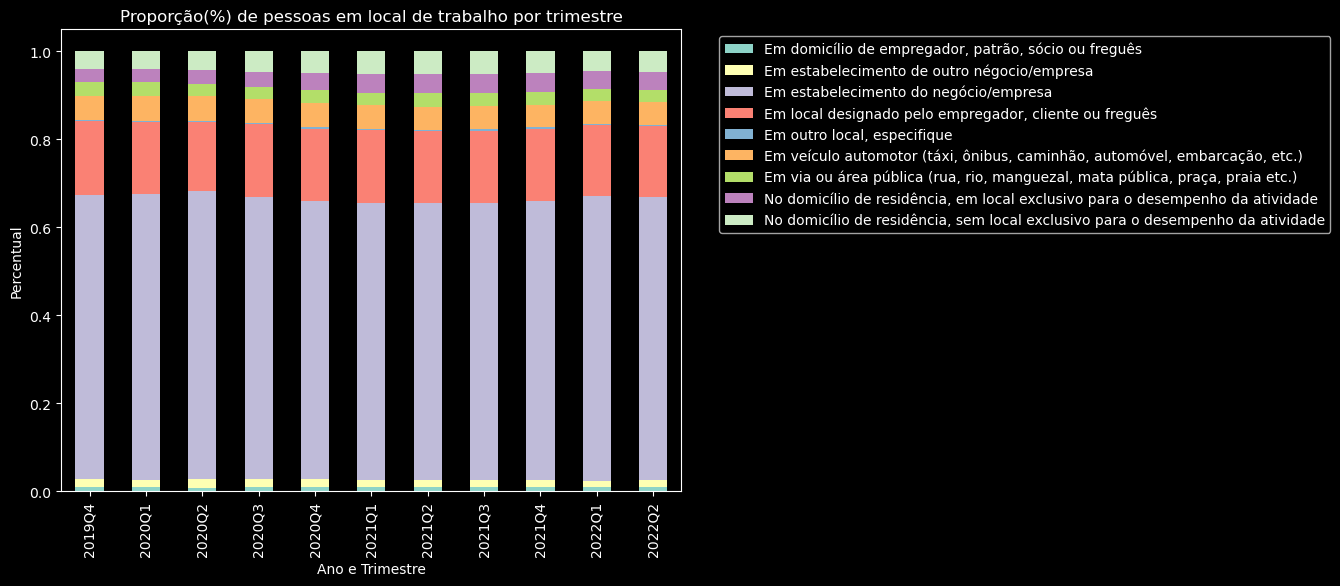

In [ ]:
pd.crosstab(index=pnadc_completa['ano_tri'],
                            columns=pnadc_completa['V4022'], 
                            values=(pnadc_completa['V1029']*pnadc_completa['posest'])/pnadc_completa['V1029'], 
                            aggfunc='sum',
                            normalize='index').plot(kind='bar', 
                                                    stacked=True, 
                                                    figsize=(8, 6), 
                                                    title='Proporção(%) de pessoas em local de trabalho por trimestre')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 10})
plt.xlabel('Ano e Trimestre')
plt.ylabel('Percentual')

plt.show()

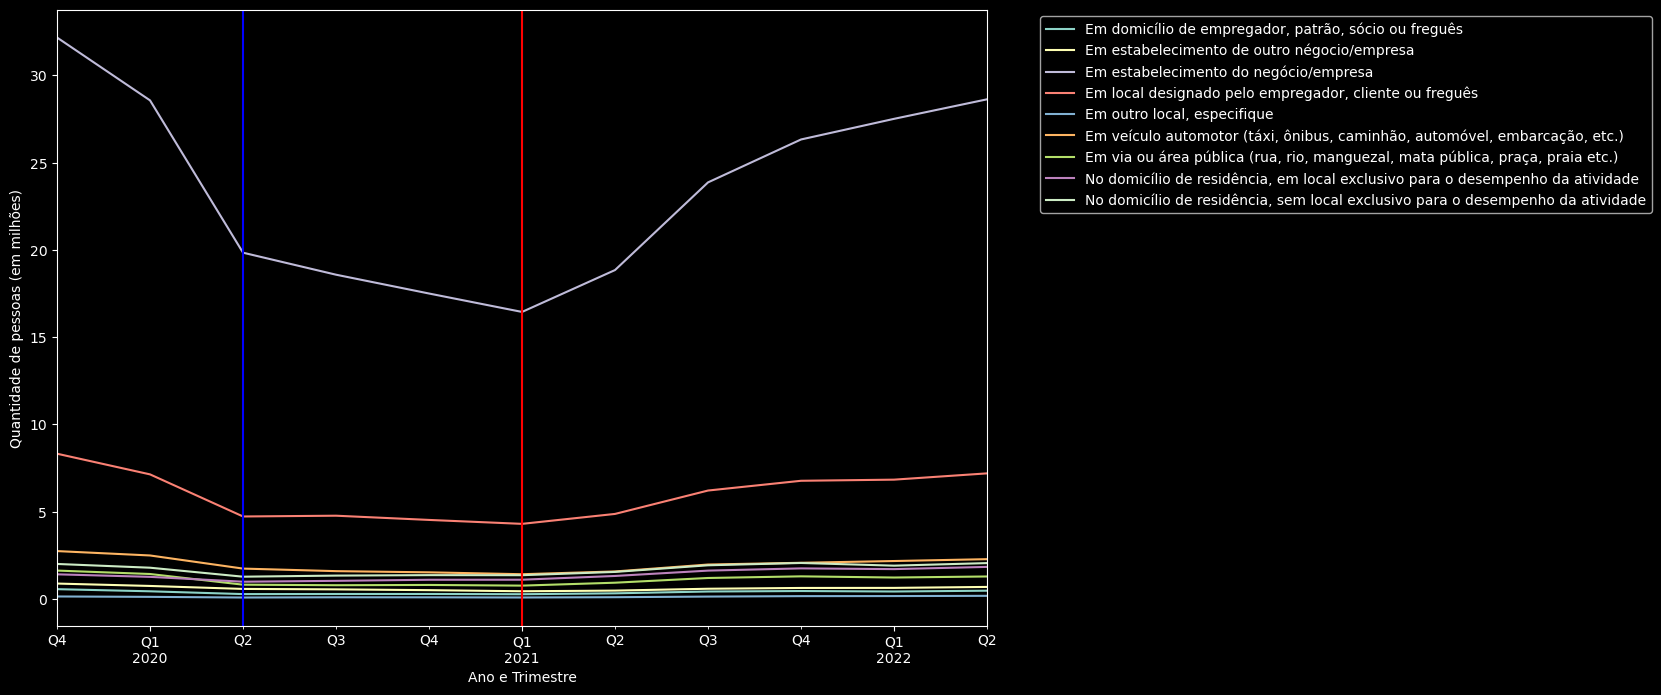

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
(local_trabalho_expandido/1000000).plot(ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 10})
plt.axvline(x = '2020Q2', color = 'b', label = 'Início do Lockdown no Brasil')
plt.axvline(x = '2021Q1', color = 'r', label = 'Início da vacinação no Brasil')
plt.xlabel('Ano e Trimestre')
plt.ylabel('Quantidade de pessoas (em milhões)')
plt.show()

In [ ]:
local_trabalho_sexo = pd.crosstab(index=pnadc_completa['ano_tri'],
                            columns=[pnadc_completa['V4022'], pnadc_completa['V2007']],
                            values=(pnadc_completa['V1029']*pnadc_completa['posest'])/pnadc_completa['V1029'],
                            aggfunc='sum')

local_trabalho_sexo

V4022   Em domicílio de empregador, patrão, sócio ou freguês            \
V2007                                                      0         1   
ano_tri                                                                  
2019Q4                                            335732.0    215433.0   
2020Q1                                            259659.0    169363.0   
2020Q2                                            157722.0    111317.0   
2020Q3                                            170006.0    104349.0   
2020Q4                                            171649.0    104503.0   
2021Q1                                            167224.0     94678.0   
2021Q2                                            193411.0    119968.0   
2021Q3                                            259125.0    157651.0   
2021Q4                                            290399.0    154547.0   
2022Q1                                            263579.0    153222.0   
2022Q2                                            302794.0    160568.0   

V4022   Em estabelecimento de outro négocio/empresa            \
V2007                                             0         1   
ano_tri                                                         
2019Q4                                     515398.0  356896.0   
2020Q1                                     444222.0  291399.0   
2020Q2                                     338183.0  227242.0   
2020Q3                                     322224.0  216797.0   
2020Q4                                     297080.0  197498.0   
2021Q1                                     255167.0  176317.0   
2021Q2                                     264640.0  204351.0   
2021Q3                                     338639.0  236901.0   
2021Q4                                     366581.0  254163.0   
2022Q1                                     358686.0  265661.0   
2022Q2                                     382433.0  297527.0   

V4022   Em estabelecimento do negócio/empresa              \
V2007                                       0           1   
ano_tri                                                     
2019Q4                             17357536.0  14807735.0   
2020Q1                             15500727.0  13062873.0   
2020Q2                             10828743.0   9005734.0   
2020Q3                             10273492.0   8299704.0   
2020Q4                              9651033.0   7843768.0   
2021Q1                              9082586.0   7356494.0   
2021Q2                             10356455.0   8482619.0   
2021Q3                             13081380.0  10781918.0   
2021Q4                             14288231.0  12034467.0   
2022Q1                             14884715.0  12620085.0   
2022Q2                             15398959.0  13225268.0   

V4022   Em local designado pelo empregador, cliente ou freguês             \
V2007                                                        0          1   
ano_tri                                                                     
2019Q4                                           6995626.0      1318649.0   
2020Q1                                           6045708.0      1083912.0   
2020Q2                                           4009294.0       707780.0   
2020Q3                                           4091970.0       669241.0   
2020Q4                                           3859096.0       660243.0   
2021Q1                                           3691262.0       602736.0   
2021Q2                                           4196358.0       666982.0   
2021Q3                                           5380774.0       823074.0   
2021Q4                                           5849915.0       912884.0   
2022Q1                                           5898200.0       929264.0   
2022Q2                                           6204344.0       982967.0   

V4022   Em outro local, especifique           \
V2007                             0        1   
ano_tri               

In [ ]:
#TODO: Criar uma gráfico 3x3 parar mostrar o comportamento da variável 'V2007' dentro da variável 'V4022' por trimestre

In [ ]:
categorias_local = pnadc_completa['V4022'].dropna().unique()
categorias_local
categorias_plot = pd.DataFrame({'V4022': categorias_local, 'coluna':[0,0,0,1,1,1,2,2,2], 'linha':[0,1,2,0,1,2,0,1,2]})

In [ ]:
categorias_plot

,V4022,coluna,linha
0,Em estabelecimento do negócio/empresa,0,0
1,"Em domicílio de empregador, patrão, sócio ou f...",0,1
2,"Em via ou área pública (rua, rio, manguezal, m...",0,2
3,"Em local designado pelo empregador, cliente ou...",1,0
4,"No domicílio de residência, sem local exclusiv...",1,1
5,"Em veículo automotor (táxi, ônibus, caminhão, ...",1,2
6,Em estabelecimento de outro négocio/empresa,2,0
7,"No domicílio de residência, em local exclusivo...",2,1
8,"Em outro local, especifique",2,2


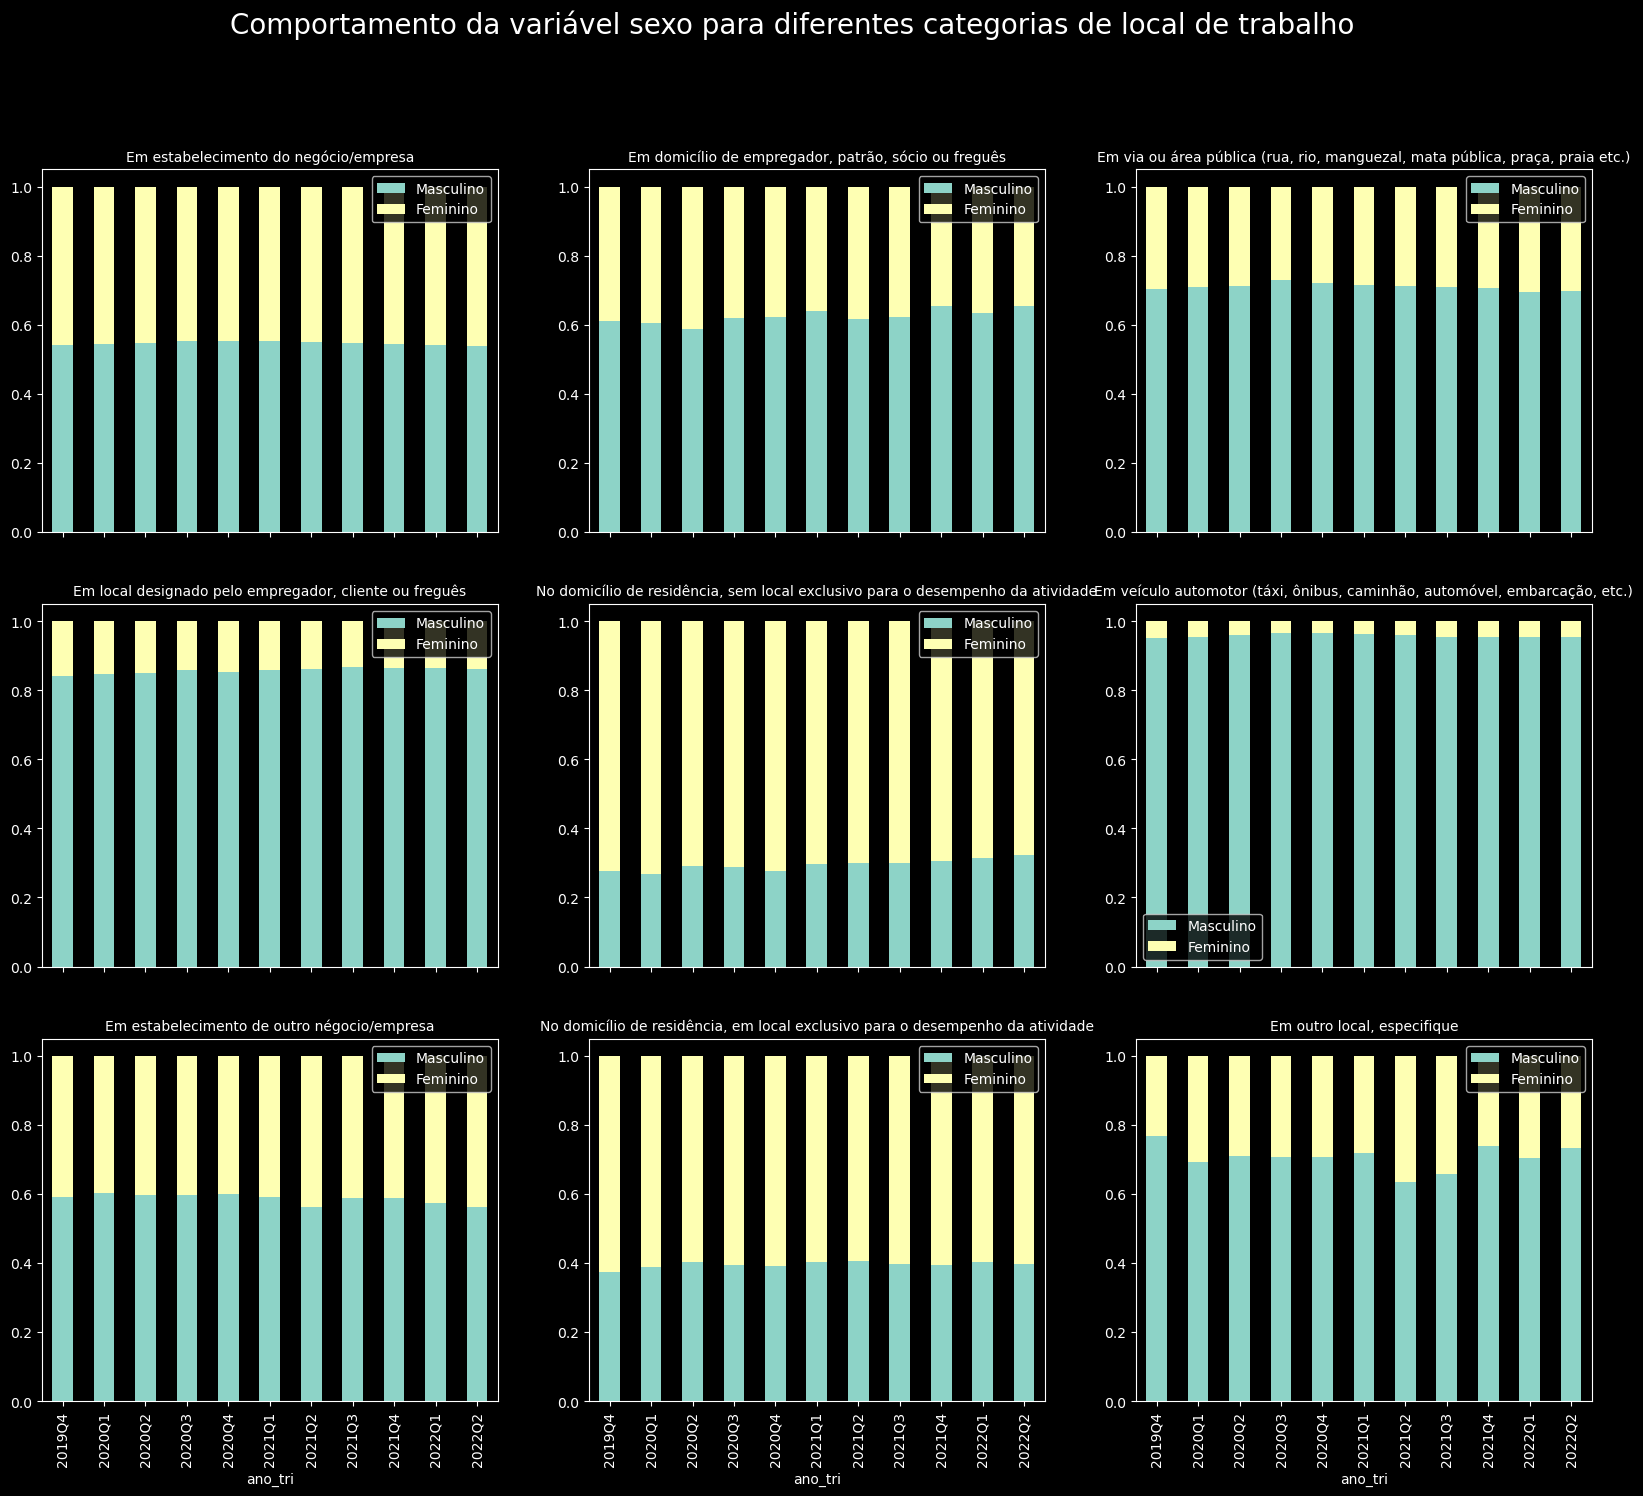

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 16), sharex=True)

fig.suptitle('Comportamento da variável sexo para diferentes categorias de local de trabalho', size=20) #Título para a figura toda
for i in range(0, 9):

    local_trabalho_sexo = pd.crosstab(index=pnadc_completa.where(pnadc_completa['V4022']==categorias_plot['V4022'][i])['ano_tri'],
                            columns=[pnadc_completa.where(pnadc_completa['V4022']==categorias_plot['V4022'][i])['V4022'], 
                                        pnadc_completa.where(pnadc_completa['V4022']==categorias_plot['V4022'][i])['V2007']],
                            values=(pnadc_completa.where(pnadc_completa['V4022']==categorias_plot['V4022'][i])['V1029'] * \
                                        pnadc_completa.where(pnadc_completa['V4022']==categorias_plot['V4022'][i])['posest']) / \
                                        pnadc_completa.where(pnadc_completa['V4022']==categorias_plot['V4022'][i])['V1029'],
                            aggfunc='sum',
                            normalize='index')
                            
    local_trabalho_sexo.columns = ['Masculino', 'Feminino']

    (local_trabalho_sexo).plot(ax=axes[categorias_plot['coluna'][i],categorias_plot['linha'][i]], kind='bar', stacked=True, title=categorias_plot['V4022'][i])
    axes[categorias_plot['coluna'][i],categorias_plot['linha'][i]].set_title(categorias_plot['V4022'][i], size=10)
    #axes[categorias_plot['coluna'][i],categorias_plot['linha'][i]].set_xticklabels(fontsize=12, rotation=45)
    #axes[categorias_plot['coluna'][i],categorias_plot['linha'][i]].set_xlabel('Ano e Trimestre', size=12)
    #axes[categorias_plot['coluna'][i],categorias_plot['linha'][i]].set_ylabel('Quantidade de Pessoas (Milhões)', size=12)

plt.show()

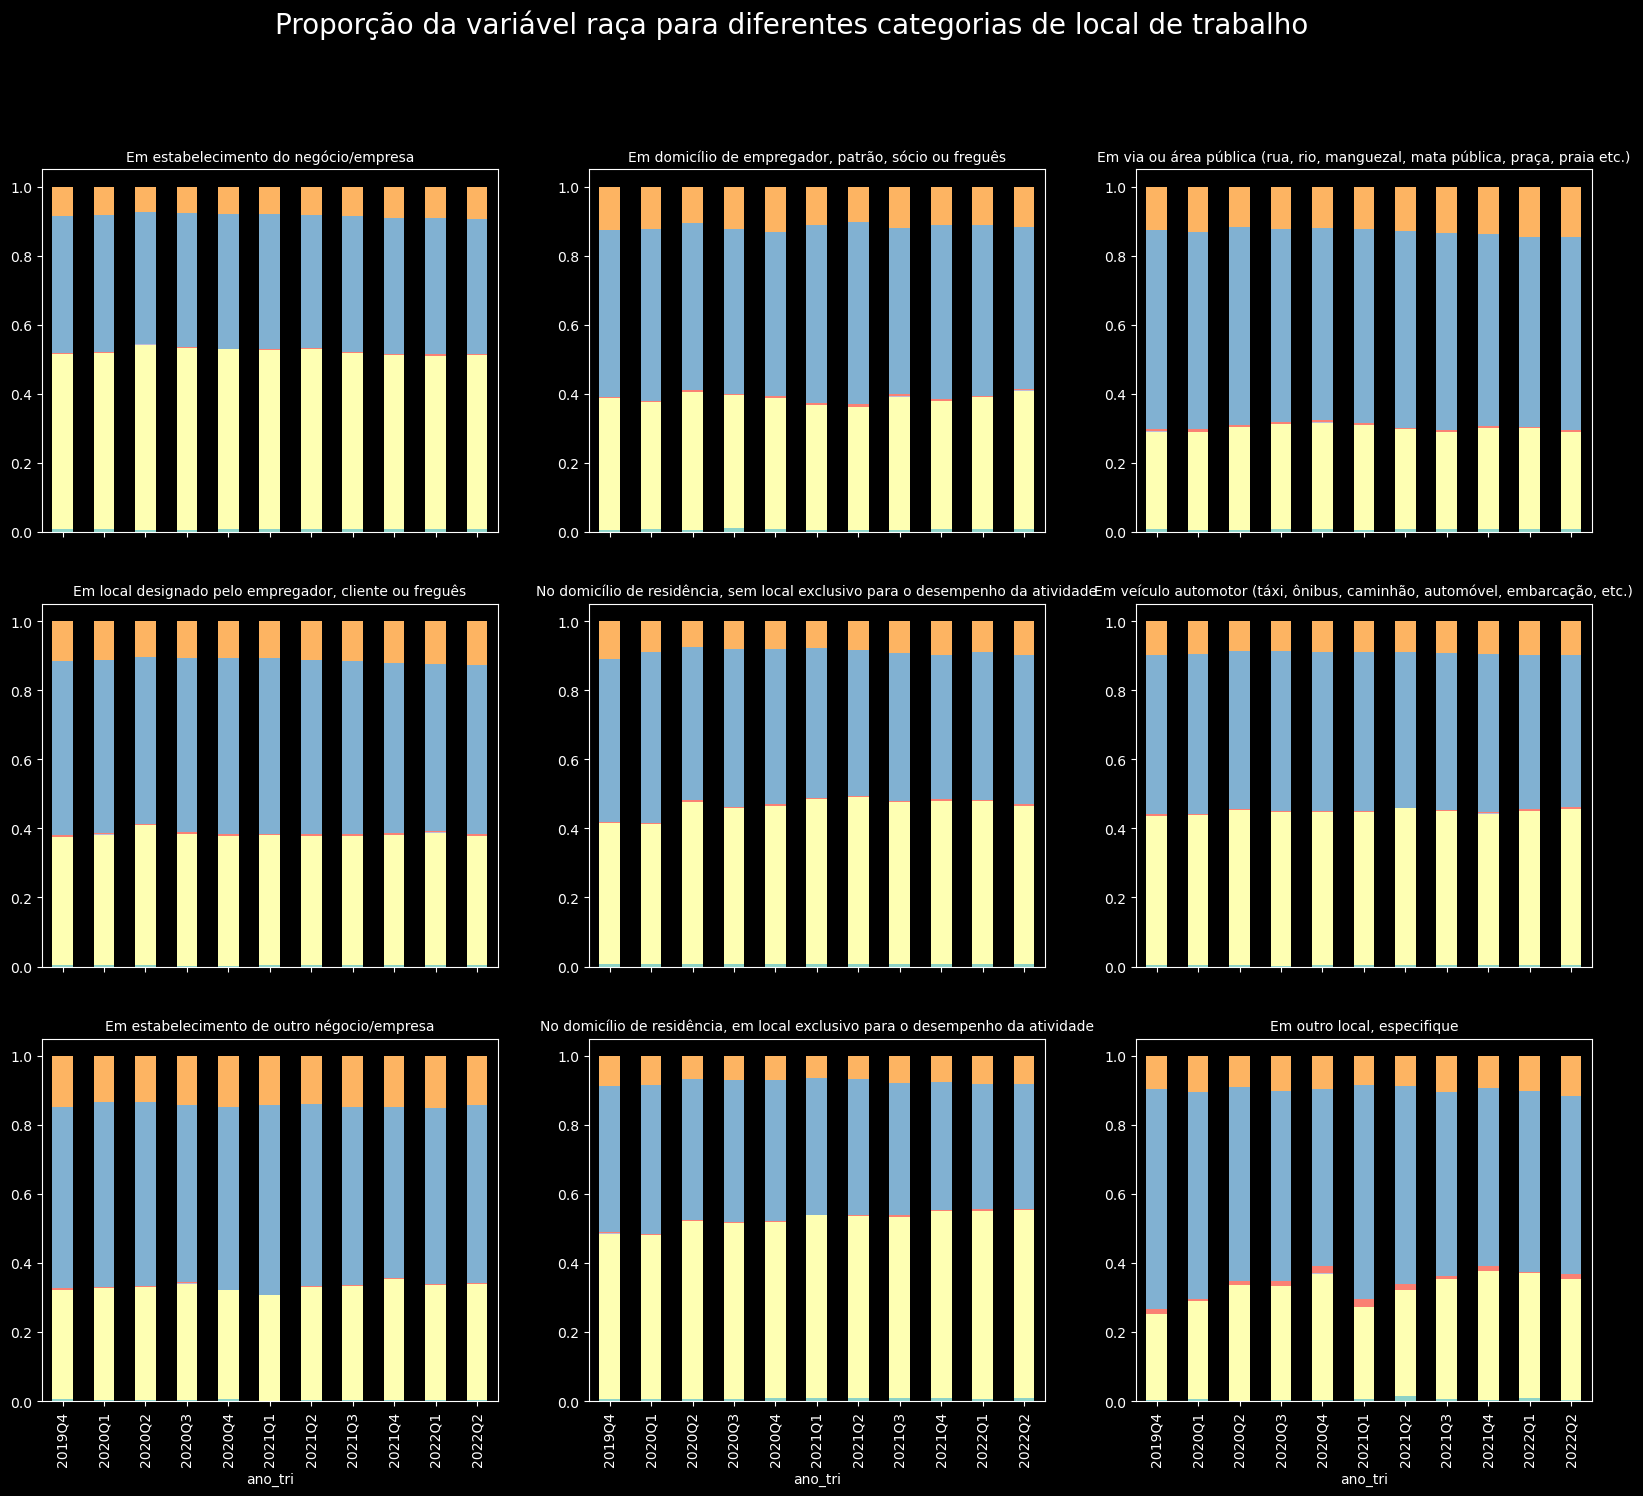

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 16), sharex=True)

fig.suptitle('Proporção da variável raça para diferentes categorias de local de trabalho', size=20) #Título para a figura toda
for i in range(0, 9):

    local_trabalho_raca = pd.crosstab(index=pnadc_completa.where(pnadc_completa['V4022']==categorias_plot['V4022'][i])['ano_tri'],
                            columns=[pnadc_completa.where(pnadc_completa['V4022']==categorias_plot['V4022'][i])['V4022'], 
                                        pnadc_completa.where(pnadc_completa['V4022']==categorias_plot['V4022'][i])['V2010']],
                            values=(pnadc_completa.where(pnadc_completa['V4022']==categorias_plot['V4022'][i])['V1029'] * \
                                        pnadc_completa.where(pnadc_completa['V4022']==categorias_plot['V4022'][i])['posest']) / \
                                        pnadc_completa.where(pnadc_completa['V4022']==categorias_plot['V4022'][i])['V1029'],
                            aggfunc='sum',
                            normalize='index')
                            
    #local_trabalho_sexo.columns = ['Masculino', 'Feminino']

    (local_trabalho_raca).plot(ax=axes[categorias_plot['coluna'][i],categorias_plot['linha'][i]], kind='bar', stacked=True, title=categorias_plot['V4022'][i], legend=None)
    axes[categorias_plot['coluna'][i],categorias_plot['linha'][i]].set_title(categorias_plot['V4022'][i], size=10)
    
plt.show()

#TODO: Inserir somente uma legenda entre o título e os gráficos para identificar as cores, sem aparecer o nome do local de trabalho.

In [ ]:
#Função para estimar média agrupada por alguma coluna

def weighted_average(df,data_col,weight_col,by_col):
    df['_data_times_weight'] = df[data_col]*df[weight_col]
    df['_weight_where_notnull'] = df[weight_col]*pd.notnull(df[data_col])
    g = df.groupby(by_col)
    result = g['_data_times_weight'].sum() / g['_weight_where_notnull'].sum()
    del df['_data_times_weight'], df['_weight_where_notnull']
    return result

#### Análise da variação do local de trabalho ao longo do tempo através dos indivíduos em trimestres consecutivos

> A Pnad Contínua não permite que o acompanhamento das mesmas pessoas, ou seja, dos mesmos indivíduos seja feito de forma direta. Em primeiro lugar, porque a pesquisa investiga os mesmos domicílios de forma recorrente, mas nada garante que os indivíduos investigados pela primeira entrevista em determinado domicílio sejam encontrados residindo no mesmo domicílio nas próximas quatro entrevistas (perda por não resposta). 

> Em segundo lugar, não há uma maneira direta de acompanhar as mesmas pessoas entre um trimestre e outro, porque o IBGE fornece apenas a chave de identificação dos domicílios, mas não divulga a chave de identificação dos moradores dentro de cada domicílio.

> Para resolver o primeiro problema, de perda por não resposta, optou-se por utilizar somente as informações de trimestres consecutivos, ao invés de acompanhar um período mais longo

> Para resolver o segundo problema, isto é, o da falta de uma chave de identificação individual para os moradores dos domicílios investigados, utilizar-se-á a estratégia de combinar as informações de moradia, sexo e data de nascimento dos moradores.

In [ ]:
#TODO: Criar base que dentifique , em trimestres consecutivos para cada ano, a mudança de local de trabalho para os indivíduos

"...devem ser calculados novos pesos para as pessoas investigadas
que permaneçam na subamostra de dados longitudinais, de forma a compensar as
perdas ocorridas em relação à amostra original, conforme apresentadas na seção
anterior. Os pesos de expansão dessa subamostra consideram os respondentes no
primeiro trimestre e devem ser ajustados de acordo com as perdas, devido a
problemas de identificação entre um trimestre e outro e devido a não resposta no
segundo trimestre."

O cálculo dos novos pesos é feito em duas etapas:
1. A primeira etapa ajusta os pesos de forma a compensar as perdas em relação
à amostra original, apresentadas no Quadro 1;
2. Na segunda etapa, os pesos da subamostra devem ser ajustados para que as
estimativas da população da subamostra, por sexo e faixa etária,
correspondam às estimativas, por sexo e faixa etária, obtidas para a amostra
original da Pnad Contínua, em cada um dos 77 domínios de estimação
(variável posest).

In [ ]:
#TODO: Calcular novos pesos e expandir as observações da análise anterior

In [ ]:
#TODO: Criar Visualização para a amostra criada.